# Hafta 13 - Derin Öğrenme Uygulamaları

Bu notebook'ta iki farklı derin öğrenme uygulaması bulunmaktadır:
- **14-A:** Çiçek Türü Sınıflandırması (Görsel Sınıflandırma)
- **14-B:** Twitter Duygu Analizi (Doğal Dil İşleme)

## Uygulama 14-A: Çiçek Türü Sınıflandırması

Bu uygulamada, 5 farklı çiçek türünü (roses, sunflowers, tulips, dandelion, daisy) sınıflandıran bir CNN modeli oluşturacağız.

In [1]:
# 14-A: Gerekli kütüphanelerin yüklenmesi
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

print("14-A: Çiçek Sınıflandırması için kütüphaneler yüklendi.")
print(f"TensorFlow versiyonu: {tf.__version__}")

14-A: Çiçek Sınıflandırması için kütüphaneler yüklendi.
TensorFlow versiyonu: 2.19.0


In [2]:
# 14-A: Veri setinin hazırlanması
data_dir = '14a'  # Çiçek resimlerinin bulunduğu klasör
img_height, img_width = 150, 150
batch_size = 32

# Veri artırma (Data Augmentation) ile eğitim verisi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Eğitim verisi
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Doğrulama verisi
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print(f"Çiçek türleri: {list(train_generator.class_indices.keys())}")
print(f"Eğitim örnekleri: {train_generator.samples}")
print(f"Doğrulama örnekleri: {validation_generator.samples}")

Found 2234 images belonging to 5 classes.
Found 556 images belonging to 5 classes.
Çiçek türleri: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Eğitim örnekleri: 2234
Doğrulama örnekleri: 556


In [3]:
# 14-A: CNN Modelinin oluşturulması
model_14a = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 çiçek türü
])

model_14a.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("14-A: CNN modeli oluşturuldu.")
model_14a.summary()

14-A: CNN modeli oluşturuldu.


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,173 (13.18 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 14-A: Modelin eğitilmesi
epochs = 20

history_14a = model_14a.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1
)

print("14-A: Model eğitimi tamamlandı.")

/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 234ms/step - accuracy: 0.3998 - loss: 1.2970 - val_accuracy: 0.5809 - val_loss: 0.9969
Epoch 2/20
 1/69 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.5938 - loss: 1.0102

/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5938 - loss: 1.0102 - val_accuracy: 0.5717 - val_loss: 1.0204
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.6117 - loss: 0.9003 - val_accuracy: 0.6471 - val_loss: 0.8580
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6250 - loss: 0.9900 - val_accuracy: 0.6526 - val_loss: 0.8531
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.6882 - loss: 0.7685 - val_accuracy: 0.7151 - val_loss: 0.7444
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7500 - loss: 0.7180 - val_accuracy: 0.7132 - val_loss: 0.7563
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.6902 - loss: 0.7465 - val_accuracy: 0.7004 - val_loss: 0.7342
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6875 - loss: 0.9497 - val_accuracy: 0.7298 - val_loss: 0.7221
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.7426 - loss: 0.6569 - val_accuracy: 0.7243 - val_

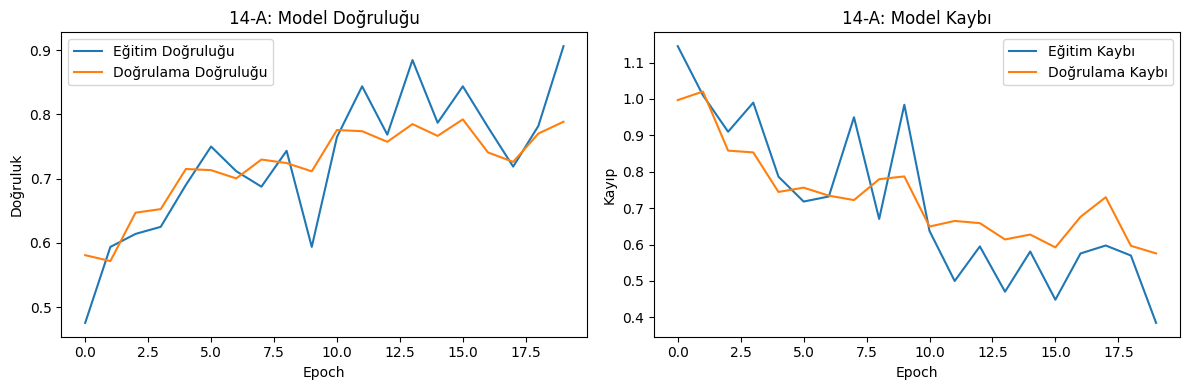

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.7781 - loss: 0.5882

14-A Final Sonuçlar:
Doğrulama Doğruluğu: 0.7662
Doğrulama Kaybı: 0.5928


In [5]:
# 14-A: Eğitim sonuçlarının görselleştirilmesi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_14a.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_14a.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('14-A: Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_14a.history['loss'], label='Eğitim Kaybı')
plt.plot(history_14a.history['val_loss'], label='Doğrulama Kaybı')
plt.title('14-A: Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

# Final sonuçlar
final_loss, final_accuracy = model_14a.evaluate(validation_generator)
print(f"\n14-A Final Sonuçlar:")
print(f"Doğrulama Doğruluğu: {final_accuracy:.4f}")
print(f"Doğrulama Kaybı: {final_loss:.4f}")

---

## Uygulama 14-B: Twitter Duygu Analizi

Bu uygulamada, Twitter verilerini kullanarak duygu analizi yapan bir model oluşturacağız.

In [6]:
# 14-B: Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("14-B: Duygu analizi için kütüphaneler yüklendi.")

# NLTK indirmeleri
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
except:
    print("NLTK indirileri atlandı.")

14-B: Duygu analizi için kütüphaneler yüklendi.


Toplam veri sayısı: 3085

Duygu dağılımı:
sentiment
nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: count, dtype: int64


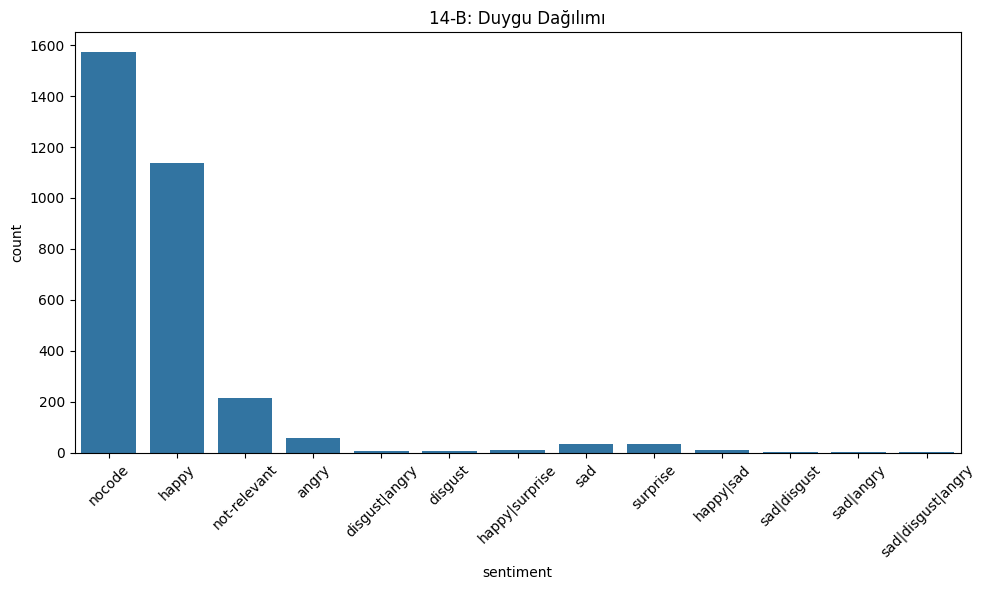


İlk 5 örnek:
             tweet_id                                         tweet_text  \
0  611857364396965889  @aandraous @britishmuseum @AndrewsAntonio Merc...   
1  614484565059596288  Dorian Gray with Rainbow Scarf #LoveWins (from...   
2  614746522043973632  @SelectShowcase @Tate_StIves ... Replace with ...   
3  614877582664835073  @Sofabsports thank you for following me back. ...   
4  611932373039644672  @britishmuseum @TudorHistory What a beautiful ...   

  sentiment  
0    nocode  
1     happy  
2     happy  
3     happy  
4     happy  


In [7]:
# 14-B: Veri setinin yüklenmesi ve ön işleme
df = pd.read_csv('14b/smile-annotations-final.csv', names=['tweet_id', 'tweet_text', 'sentiment'])

print(f"Toplam veri sayısı: {len(df)}")
print(f"\nDuygu dağılımı:")
print(df['sentiment'].value_counts())

# Veriyi görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title('14-B: Duygu Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# İlk 5 örnek
print("\nİlk 5 örnek:")
print(df.head())

In [8]:
# 14-B: Metin ön işleme fonksiyonu
def preprocess_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # URL'leri kaldır
    text = re.sub(r'http\S+', '', text)
    # Mention'ları kaldır
    text = re.sub(r'@\w+', '', text)
    # Hashtag'leri kaldır
    text = re.sub(r'#\w+', '', text)
    # Özel karakterleri kaldır
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Fazla boşlukları temizle
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Metinleri ön işle
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Boş metinleri kaldır
df = df[df['cleaned_text'].str.len() > 0]

print(f"Temizleme sonrası veri sayısı: {len(df)}")
print("\nÖrnek temizlenmiş metinler:")
for i in range(3):
    print(f"Orijinal: {df.iloc[i]['tweet_text']}")
    print(f"Temizlenmiş: {df.iloc[i]['cleaned_text']}")
    print(f"Duygu: {df.iloc[i]['sentiment']}\n")

Temizleme sonrası veri sayısı: 2959

Örnek temizlenmiş metinler:
Orijinal: @aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap
Temizlenmiş: merci pour le partage
Duygu: nocode

Orijinal: Dorian Gray with Rainbow Scarf #LoveWins (from @britishmuseum http://t.co/Q4XSwL0esu) http://t.co/h0evbTBWRq
Temizlenmiş: dorian gray with rainbow scarf from
Duygu: happy

Orijinal: @SelectShowcase @Tate_StIves ... Replace with your wish which the artist uses in next installation! It was entralling!
Temizlenmiş: replace with your wish which the artist uses in next installation it was entralling
Duygu: happy



In [9]:
# 14-B: Ana duygu kategorilerini filtrele (sadece happy, angry, sad)
main_sentiments = ['happy', 'angry', 'sad']
df_filtered = df[df['sentiment'].isin(main_sentiments)].copy()

print(f"Filtrelenmiş veri sayısı: {len(df_filtered)}")
print(f"\nFiltrelenmiş duygu dağılımı:")
print(df_filtered['sentiment'].value_counts())

# Etiketleri sayısal değerlere çevir
label_encoder = LabelEncoder()
df_filtered['sentiment_encoded'] = label_encoder.fit_transform(df_filtered['sentiment'])

print(f"\nEtiket eşleştirmesi:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

Filtrelenmiş veri sayısı: 1220

Filtrelenmiş duygu dağılımı:
sentiment
happy    1132
angry      56
sad        32
Name: count, dtype: int64

Etiket eşleştirmesi:
0: angry
1: happy
2: sad


In [10]:
# 14-B: Metin tokenizasyonu ve padding
max_words = 10000
max_len = 100

# Tokenizer oluştur
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df_filtered['cleaned_text'])

# Metinleri sayısal dizilere çevir
sequences = tokenizer.texts_to_sequences(df_filtered['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = df_filtered['sentiment_encoded'].values

print(f"Tokenizer kelime sayısı: {len(tokenizer.word_index)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEğitim seti: {X_train.shape[0]}")
print(f"Test seti: {X_test.shape[0]}")

Tokenizer kelime sayısı: 2928
X shape: (1220, 100)
y shape: (1220,)

Eğitim seti: 976
Test seti: 244


In [11]:
# 14-B: LSTM modelinin oluşturulması
model_14b = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, dropout=0.5, recurrent_dropout=0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 duygu kategorisi
])

model_14b.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("14-B: LSTM modeli oluşturuldu.")
model_14b.summary()

14-B: LSTM modeli oluşturuldu.


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 14-B: Modelin eğitilmesi
epochs = 15
batch_size = 64

history_14b = model_14b.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

print("14-B: Model eğitimi tamamlandı.")

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8072 - loss: 0.9475 - val_accuracy: 0.9262 - val_loss: 0.3377
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9199 - loss: 0.4080 - val_accuracy: 0.9262 - val_loss: 0.3523
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9280 - loss: 0.3334 - val_accuracy: 0.9262 - val_loss: 0.3050
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9264 - loss: 0.3330 - val_accuracy: 0.9262 - val_loss: 0.3122
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9358 - loss: 0.2814 - val_accuracy: 0.9262 - val_loss: 0.2977
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9240 - loss: 0.3116 - val_accuracy: 0.9262 - val_loss: 0.2862
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9159 - loss: 0.2632 - val_accuracy: 0.9262 - val_loss: 0.2765
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9356 - loss: 0.1750 - val_accuracy: 0.9262 - v

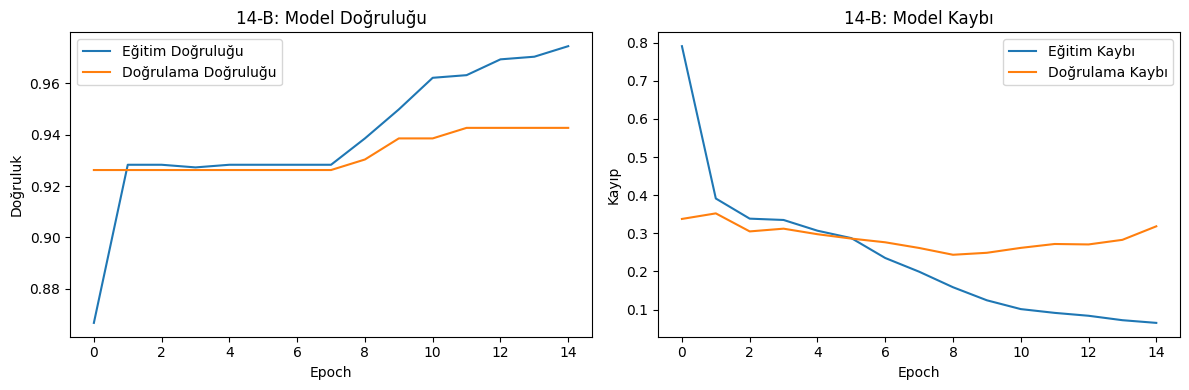

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

14-B: Sınıflandırma Raporu:
              precision    recall  f1-score   support

       angry       1.00      0.45      0.62        11
       happy       0.95      1.00      0.97       226
         sad       0.00      0.00      0.00         7

    accuracy                           0.94       244
   macro avg       0.65      0.48      0.53       244
weighted avg       0.92      0.94      0.93       244


14-B Final Test Doğruluğu: 0.9426


In [13]:
# 14-B: Sonuçların değerlendirilmesi ve görselleştirilmesi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_14b.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_14b.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('14-B: Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_14b.history['loss'], label='Eğitim Kaybı')
plt.plot(history_14b.history['val_loss'], label='Doğrulama Kaybı')
plt.title('14-B: Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

# Test seti üzerinde tahmin
y_pred = model_14b.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Sınıflandırma raporu
print("\n14-B: Sınıflandırma Raporu:")
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Final doğruluk
test_loss, test_accuracy = model_14b.evaluate(X_test, y_test, verbose=0)
print(f"\n14-B Final Test Doğruluğu: {test_accuracy:.4f}")

In [14]:
# 14-B: Örnek tahminler
def predict_sentiment(text):
    # Metni ön işle
    cleaned = preprocess_text(text)
    # Tokenize et
    sequence = tokenizer.texts_to_sequences([cleaned])
    # Padding uygula
    padded = pad_sequences(sequence, maxlen=max_len)
    # Tahmin yap
    prediction = model_14b.predict(padded)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    sentiment_label = label_encoder.inverse_transform([predicted_class])[0]
    return sentiment_label, confidence

# Test cümleleri
test_sentences = [
    "I love this beautiful day!",
    "This is the worst thing ever!",
    "I feel so sad and disappointed",
    "Amazing exhibition at the museum today!",
    "Terrible service, very angry"
]

print("14-B: Örnek Tahminler:")
print("-" * 50)
for sentence in test_sentences:
    sentiment, confidence = predict_sentiment(sentence)
    print(f"Metin: {sentence}")
    print(f"Tahmin: {sentiment} (Güven: {confidence:.3f})")
    print("-" * 50)

14-B: Örnek Tahminler:
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Metin: I love this beautiful day!
Tahmin: happy (Güven: 1.000)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Metin: This is the worst thing ever!
Tahmin: happy (Güven: 0.999)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Metin: I feel so sad and disappointed
Tahmin: happy (Güven: 0.962)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Metin: Amazing exhibition at the museum today!
Tahmin: happy (Güven: 0.999)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Metin: Terrible service, very angry
Tahmin: happy (Güven: 0.996)
--------------------------------------------------


## Özet

### Uygulama 14-A: Çiçek Sınıflandırması
- **Veri Seti:** 5 farklı çiçek türü (roses, sunflowers, tulips, dandelion, daisy)
- **Model:** Convolutional Neural Network (CNN)
- **Özellikler:** Veri artırma, dropout, çoklu konvolüsyon katmanları

### Uygulama 14-B: Duygu Analizi
- **Veri Seti:** Twitter verileri (happy, angry, sad)
- **Model:** Long Short-Term Memory (LSTM)
- **Özellikler:** Metin ön işleme, tokenizasyon, gömme katmanı

Her iki uygulama da derin öğrenmenin farklı alanlarındaki gücünü göstermektedir:
- **Görüntü işleme:** CNN ile görsel tanıma
- **Doğal dil işleme:** LSTM ile metin analizi